<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$sigma(z) = \frac{1}{1 + e^{-z}}$$

# 로지스틱 회귀
```
시그모이드 함수
선형결합이 음수 양수 다양하게 나올수 있는데 이 값을 확률로
바꾸기 위해서 0~1사이로  바꾼다 e-z는 지수함수로 (z)가
커질수록 급격히 값이 변해서 S자 모양으로 만듦
```
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
```
선형결합
```
$$z = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$
```
손실함수(로그손실)
```
$$J(w) = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$$


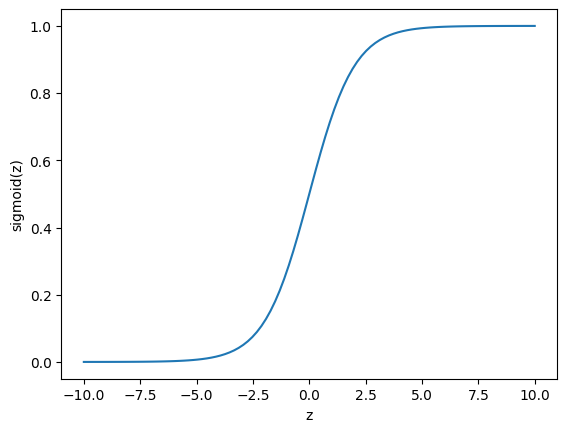

In [ ]:
# 시그모이드 함수 확인
# z 값이 변할때 0과 1사이로 나오는지 확인
import numpy as np
import matplotlib.pyplot as plt

# x 값 지정
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

# 그래프 그리기
plt.plot(z, sigmoid)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.show()

In [ ]:
# z = w0  + w1x1 + w2x2
# 문장의 길이, '스펨' 단어 수
X = np.array([[2,1],[5,3]])  # 샘플
w = np.array([0.5,1.0]) # 가중치
w0 = 0.1 # 절편
z = w0 + np.dot(X,w)
print(z)
1 / (1 + np.exp(-2.1)), 1 / (1 + np.exp(-5.6))

[2.1 5.6]


(np.float64(0.8909031788043871), np.float64(0.9963157601005641))

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# k-최근접이웃 다중분류
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
print(fish['Species'].unique())
X = fish.drop('Species',axis=1).to_numpy()
y = fish['Species'].to_numpy()

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
# 학습
kn.fit(X_train,y_train)
print('하이퍼 파라메터',kn.get_params())  # 학습에 적용된 하이퍼 파라메터 즉.. 함수의 매개변수
print('학습한 데이터의 class의 종류',kn.classes_)
print('각 클래스별 확률값\n',kn.predict_proba(X_test[:5]))
print('각 클래스별 확률값에 의해서 최종 선택된 클래스',kn.predict(X_test[:5]))

하이퍼 파라메터 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
학습한 데이터의 class의 종류 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
각 클래스별 확률값
 [[0.2 0.  0.6 0.  0.  0.  0.2]
 [0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.2 0.4 0.  0.4 0.  0. ]
 [0.6 0.  0.2 0.  0.  0.  0.2]]
각 클래스별 확률값에 의해서 최종 선택된 클래스 ['Perch' 'Perch' 'Perch' 'Perch' 'Bream']


In [ ]:
# 로지스틱회귀
from sklearn.linear_model import LogisticRegression  # 회귀값을 시그모이드로 확률로 변환환 분류모델
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('하이퍼 파라메터',lr.get_params())
print('학습한 데이터의 class의 종류',lr.classes_)
print('각 클래스별 확률값\n',np.round(lr.predict_proba(X_test[:5]), 3) )
print('각 클래스별 확률값에 의해서 최종 선택된 클래스',lr.predict(X_test[:5]))

하이퍼 파라메터 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
학습한 데이터의 class의 종류 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
각 클래스별 확률값
 [[0.08  0.001 0.704 0.095 0.026 0.    0.094]
 [0.007 0.06  0.558 0.014 0.328 0.024 0.01 ]
 [0.013 0.1   0.453 0.017 0.375 0.03  0.012]
 [0.02  0.098 0.489 0.02  0.341 0.017 0.016]
 [0.983 0.002 0.003 0.001 0.    0.    0.011]]
각 클래스별 확률값에 의해서 최종 선택된 클래스 ['Perch' 'Perch' 'Perch' 'Perch' 'Bream']


확률적 경사하강법
```
SGCClassifier
손실의 함수의 값이 작아지도록 가중치를 업데이트
업데이트는 p1 -> p2로 이동하는 과정
x와 y좌표의 변화량을 구하는것
--> 미분
```
가중치 업데이트 수식
$$w_j := w_j - \alpha \frac{\partial J(w)}{\partial w_j}$$

로지스틱 회귀에서 편미분
$$\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_{ij}$$

손실함수(로그손실)

$$J(w) = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$$

In [ ]:
# 라이브러 없이 이론상으로 적용
# 임의의 데이터 생성
# 공부시간 ,점수   합격/불합격
# z =  w1x1 + w2x2
X = np.array([[2,50],[4,70],[6,90],[1,40]])
y = np.array([0,1,1,0])
w = np.array([0.0,0.0])
alpha = 0.01   # lr    학습률 등산에서 보폭
epochs = 100  # 학습횟수
# 시그모이드
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# 학습
for epoch in range(epochs):
    for i in range(len(X)):
        # 선형 결합
        z = np.dot(X[i],w)
        # 예측값 계산
        y_hat = sigmoid(z)
        # 오차 계산
        error = y_hat- y[i]  # error = y[i] - y_hat
        # 가중치 업데이트
        w -= alpha*error*X[i]  # w += alpha*error*X[i]
    # epoch 10번마다 손실 출력
    if epoch % 10 ==0:
      z_all = np.dot(X, w)
      y_pred = sigmoid(z_all)
      # 값이 너무작아서 nan이 될수도 있음  기울기가 0  값이 너무크면 기울기가 폭팔
      # 계산과정을 정규화가 필요
      # 작은 값을 조금 더해서 데이터가 너무 작아지는것을 예방
      loss = -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
      print(f"Epoch {epoch}: Loss = {loss} weight = {w}")

Epoch 0: Loss = 1.1994434130181546 weight = [0.02       0.04999999]
Epoch 10: Loss = 3.455171191823771 weight = [ 0.1940413  -0.09827555]
Epoch 20: Loss = 4.479779546326156 weight = [0.38533881 0.18625185]
Epoch 30: Loss = 2.8624458840339195 weight = [0.56220308 0.10838047]
Epoch 40: Loss = 2.9636820261072527 weight = [0.74200202 0.10690017]
Epoch 50: Loss = 1.8860418817277824 weight = [0.91965819 0.05250465]
Epoch 60: Loss = 4.2447668237079945 weight = [1.10356173 0.15186184]
Epoch 70: Loss = 0.3580785991783562 weight = [ 1.27547618 -0.0465114 ]
Epoch 80: Loss = 0.343368785467419 weight = [ 1.45493234 -0.05319407]
Epoch 90: Loss = 3.1238950602027873 weight = [ 1.62960025 -0.17987871]


SGDClassfier

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
X = fish.drop('Species',axis=1).to_numpy()
y = fish['Species'].to_numpy()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(loss='log_loss',max_iter=100,random_state=42)
sg.fit(X_train,y_train)
print(sg.score(X_train,y_train),sg.score(X_test,y_test) )
sg.predict(X_test[:5]), y_test[:5]

In [ ]:
sg = SGDClassifier(loss='log_loss',max_iter=1000,random_state=42,tol=None)
sg.fit(X_train,y_train)
print(sg.score(X_train,y_train),sg.score(X_test,y_test) )

0.9606299212598425 0.90625


In [ ]:
# 예측 Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
# 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [ ]:
# 동일한 환경에서 어떤 모델이 가장 잘 예측
from sklearn.datasets import fetch_california_housing

# 결정 트리
```
지니불순도(Gini Impurity)
한 그룹에서 데이터의 특성이 나타내는 비율
순수한 정도를 나타냄
ex) k = 2(0,1) 한 그룹의 데이터가 0으로 구성되면.
p1 = 1.0, p2 = 0.0  1-1 = 0
```
$$Gini = 1 - \sum_{i=1}^{k} p_i^2$$

```
엔트로피(Entropy)
정보이론 나온 개념 : 데이터의 불확실성측정하는 또하나의 방법
log2(pi) pi가 작을수록 큰 음수를 만들어 불확실성을 키운다
밑을 2로두는이유는 이진분류에 맞춰서 비트단위로 계산
확률이 1보다 작으면 음수,합을 양수로만들고 최소화 마이너스를 붙인다
```
$$H = -\sum_{i=1}^{k} p_i \log_2(p_i)$$

```
엔트로피는 불확실성이 높을수록 커진다
한개의 클래스만 (p1 = 1, p2 = 0)
```


In [ ]:
0.03**2

0.0009

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
X = fish.drop('Species',axis=1).to_numpy()
y = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

tree.fit(X_train,y_train)
tree.score(X_train,y_train),tree.score(X_test,y_test)

(0.8067226890756303, 0.75)

교차 검증

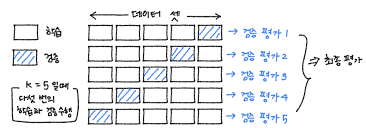

$$CV_{(k)} = \frac{1}{k} \sum_{i=1}^{k} MSE_i$$

```
교차검증의 이유
  우여히 성능이 좋은 모델이 나와서 이를 일반화하려는 일반화의 오류를 막기위해
  과적합도 해결
```

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(tree,X,y,return_train_score=True,return_indices=True)
scores
# print(scores)
# np.mean(scores['test_score'])

{'fit_time': array([0.00260019, 0.00242043, 0.00260949, 0.00234675, 0.00225472]),
 'score_time': array([0.00132895, 0.00131702, 0.0013082 , 0.00130939, 0.00116396]),
 'indices': {'train': (array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
           20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
           33,  34,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
           50,  51,  52,  53,  54,  57,  58,  59,  60,  63,  64,  65,  66,
           67,  68,  69,  70,  71,  83,  84,  85,  86,  87,  88,  89,  90,
           91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
          104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
          117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 131, 132,
          133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 148,
          149, 150, 151, 152, 153, 154, 155, 156, 157, 158]),
   array([  0,   1,   2,   3,   4,   5,   6,  14,  15,  16,  17,  18,  19,
  

In [ ]:
# 분류기 적용
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
scores = cross_validate(tree,X,y,return_train_score=True,cv=sk)
np.mean(scores['train_score'])

np.float64(0.8081938976377951)

그리드 서치
```
하이퍼 파라메터를 조합해서 최적의 값을 찾고. 해당되는 값의 모델도 같이 제공
```

In [ ]:
# 결정트리 모델에 그리드서치 적용
tree = DecisionTreeClassifier()
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# 하이퍼 파라메터 그리드 정의
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'max_depth' : [2,3,4],
    'min_samples_split' : [2,3,4],
    'criterion' : ['gini','entropy']
}
grid_search = GridSearchCV(tree,param_grid,cv=sk)
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
print(grid_search.best_params_)
best_tree_model = grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=4)

In [ ]:
scores = cross_validate(best_tree_model,X,y,return_train_score=True,cv=sk)
np.mean(scores['train_score'])

np.float64(0.8034817913385826)

In [ ]:
# 학습에 사용된 피처의 중요도(확률)
best_tree_model.feature_importances_

array([0.01807703, 0.1653425 , 0.        , 0.70469955, 0.11188092])

```
하이퍼 파라메터 튜닝 - gridSearch
교차검증(분류기를 따로 설정가능)
  cross_validate / kfold or StratifiedKfold
  성급한 일반화의 오류를 없애고 과적합 방지
Tree : 결정트리
  지니불순도 : 정보의 순수성
  엔트로피지수  : 정보이득  
  max_depth를 제어하지 않으면 과적합 필수
  가지치기 : max_depth를 제어
SGDClassfier  확률적 경사하강법
  경사하강법은 손실함수의 값의 최소가 되는 방향으로 가중치변화량 즉 미분값을 학습할때마다 기존 가중치를 업데이트
  학습률: 가중치를 업데이트할때 곱해주는 값(보폭)
  에포크: 전체 데이터를 다 사용하는 횟수
  배치  : 전체데이터를 일정한 갯수만큼 분할해서 사용
    전체데이터를 1개의 배치로 : 배치 경사하강법
    일부데이터를 배치로단위로 : 미니배치 경가하강법
    데이터 한개씩 : 확률적 경사하강법
로지스틱 회귀
  각 클래스가 될 확률을 계산해서 최종적으로 확률이 높은 클래스를 선택하는 분류모델
  확률을 계산하려면 회귀로 예측한 값을 0~1사이로 바꿔주는 로지스틱 함수를 적용( 시그모이드 함수)    
```


In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=3)
rf.fit(X_train,y_train)
# 평가
rf.score(X_train,y_train), rf.score(X_test,y_test)

(0.7226890756302521, 0.725)

In [ ]:
# 모델
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDClassifier,SGDRegressor,LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# 교차검증 및 하이퍼 파라메터 튜닝
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
# 데이터 분할
from sklearn.model_selection import train_test_split
# 데이터 스케일
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# 데이터 불균형
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# 분류
# KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,SGDClassifier,LogisticRegression
# 회귀
# LinearRegression , Ridge,Lasso,SGDRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor

# 1 step
# basemodel 찾기
# 데이터 확보
# 결측치 제거
# 각 모델에 대해 교차검증으로 가장 좋은 모델을 찾기

# 2 step
# 모델을 고정하고
# 데이터 엔지니어링 및 기타 다양한 방법을 통해 모델의 성능을 높이기

# 3step
# 모델의 하이퍼 파라메터 튜닝

# 4 해당모델에 대해서 앙상블 기법을 적용 검토
# 베깅, 부스팅, 스태킹, 투표

# 분류 타이타닉의 생존유무
# https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
# 회귀 보스턴 집값
# from sklearn.datasets import load_boston

In [ ]:
# 1 step
# basemodel 찾기
# 데이터 확보
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
# 결측치 제거
df.dropna(inplace=True)
X = df.drop(columns=['PassengerId','Survived'])
y = df['Survived']
X = X.select_dtypes(exclude='object')
ss = StandardScaler()
X = ss.fit_transform(X)
# 각 모델에 대해 교차검증으로 가장 좋은 모델을 찾기
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SGDClassifier(random_state=42),
    LogisticRegression(random_state=42)
]
for model in models:
  sk = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
  scores = cross_validate(model,X,y,cv=sk)
  print(model.__class__.__name__,np.mean(scores['test_score']))

KNeighborsClassifier 0.6713213213213214
DecisionTreeClassifier 0.6007507507507508
RandomForestClassifier 0.6662162162162162
SGDClassifier 0.5621621621621621
LogisticRegression 0.6824324324324325


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
X = df.drop(columns=['PassengerId','Survived'])
y = df['Survived']
X = X.select_dtypes(exclude='object')
# 연속형데이터를 범주형으로 벼경
X['Age'] = pd.cut(X['Age'],bins=3,labels=[0,1,2])
X['Family_count'] = X['SibSp'] + X['Parch'] + 1
X.drop(columns=['SibSp','Parch'],inplace=True)
X['Fare'] = pd.cut(X['Fare'],bins=3,labels=[0,1,2])
# 원핫
X = pd.concat([X,pd.get_dummies(df['Sex']).astype(int)], axis=1)
X = pd.concat([X,pd.get_dummies(df['Embarked']).astype(int)], axis=1)

# X['Gender'] = df['Sex'].map({
#     'male' : 0,
#     'female' : 1
# })
# X['Embarked'] = df['Embarked'].map({
#     'S' : 0,
#     'C' : 1,
#     'Q' : 2
# })
X['IsCabin'] = df['Cabin'].notnull().astype(int)
ss = StandardScaler()
X = ss.fit_transform(X)
# 각 모델에 대해 교차검증으로 가장 좋은 모델을 찾기
model = LogisticRegression (random_state=42)
sk = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
scores = cross_validate(model,X,y,cv=sk)
np.mean(scores['test_score'])

np.float64(0.7382882882882882)

In [ ]:
print(LogisticRegression ().get_params())
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
grid_search = GridSearchCV(model,param_grid,cv=sk)
grid_search.fit(X,y)
print(grid_search.best_params_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

{'C': np.float64(0.23357214690901212), 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5200 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

In [ ]:
best_model = grid_search.best_estimator_
scores = cross_validate(best_model,X,y,cv=sk)
np.mean(scores['test_score'])

np.float64(0.754954954954955)

In [ ]:
# 회귀
# from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
